Text(0.5, 1.0, 'Original Speech Signal')

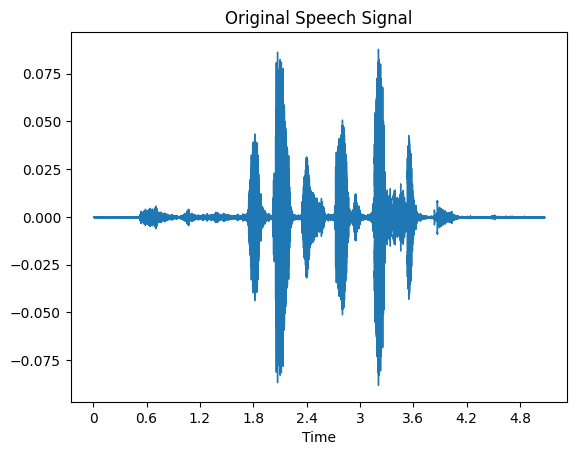

In [29]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

y, sr = librosa.load("/content/drive/MyDrive/AI_SP/AI_SP_audio.wav")
librosa.display.waveshow(y)
plt.title('Original Speech Signal')

# Q1. Use numpy.fft.fft() to transform the speech signal to its spectral domain. Please plot the amplitude part of the spectral components and observe it.

[-0.41690001+1.11022302e-16j -0.00207694-6.07890849e-02j
 -0.01853218+1.18415609e-01j ... -0.01555189+2.57825479e-01j
 -0.01853218-1.18415609e-01j -0.00207694+6.07890849e-02j]


<ipython-input-30-80c15b9bc75a>:3: ComplexWarning: Casting complex values to real discards the imaginary part
  librosa.display.waveshow(sd.astype(np.float32))


Text(35.472222222222214, 0.5, 'amplitude')

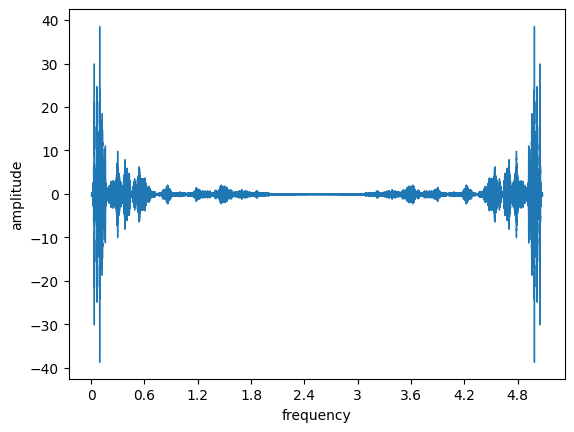

In [30]:
sd=np.fft.fft(y)
print(sd)
librosa.display.waveshow(sd.astype(np.float32))
plt.xlabel('frequency')
plt.ylabel('amplitude')

# Q2. Use numpy.fft.ifft() to inverse transform the frequency spectrum of the speech signal from frequency domain to time domain. Compare the generated time domain signal with the original signal.

<ipython-input-31-af1d78aa2d66>:1: ComplexWarning: Casting complex values to real discards the imaginary part
  td = np.fft.ifft(sd).astype(np.float32)


[ 1.0054239e-06 -2.5780320e-05  4.6999867e-06 ...  1.6504232e-04
  1.6095839e-04  1.4979304e-04]


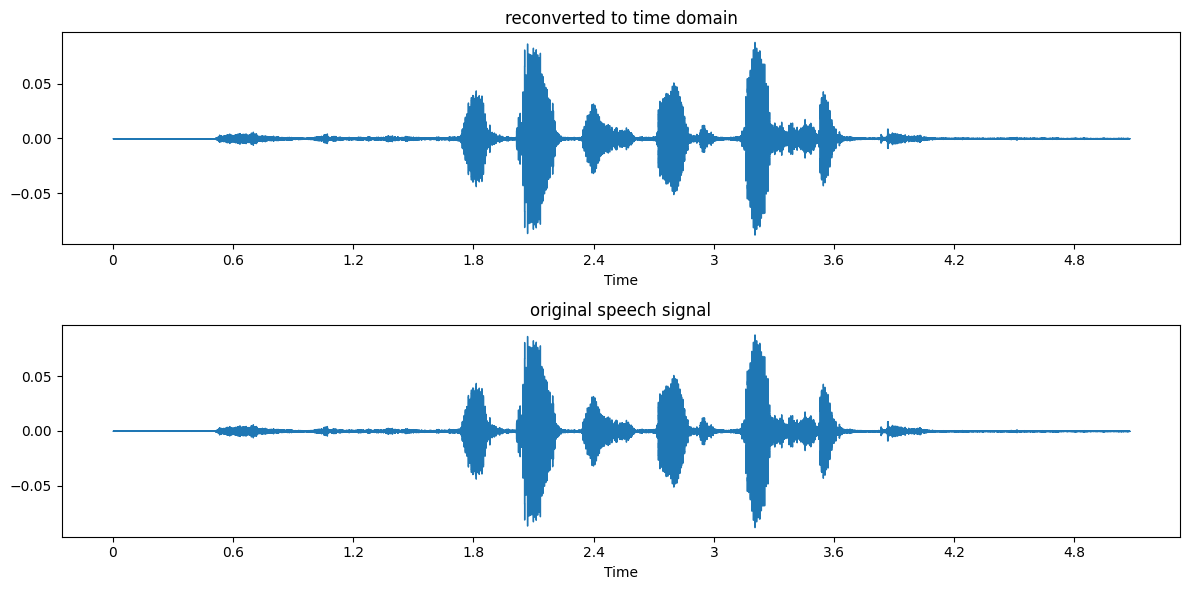

In [31]:
td = np.fft.ifft(sd).astype(np.float32)
print(td)

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
librosa.display.waveshow(td)
plt.title('reconverted to time domain')

plt.subplot(2, 1, 2)
librosa.display.waveshow(y)
plt.title('original speech signal')

plt.tight_layout()

# Q3. Perform the spectral analysis of a word present in the recorded speech. Compare the spectrum with the spectrum of the full signal.

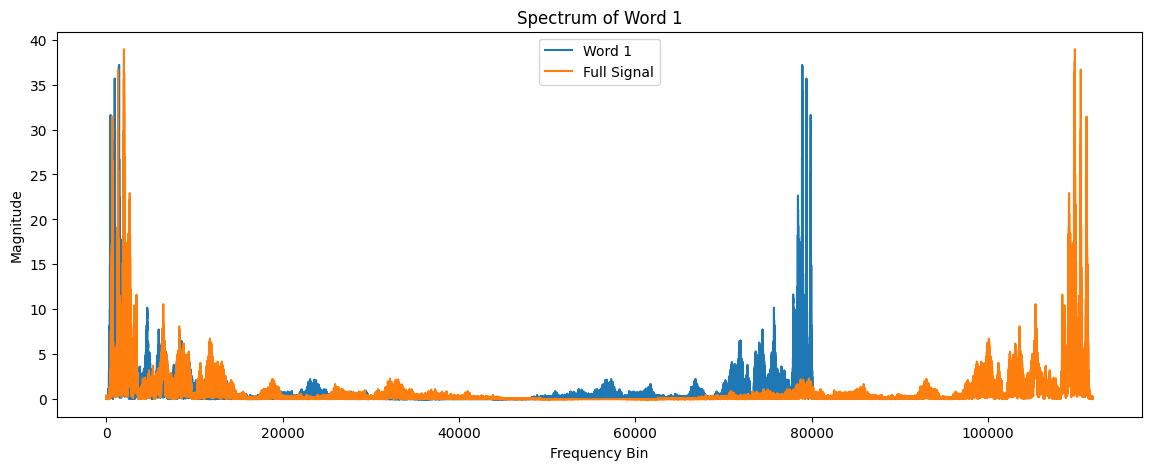

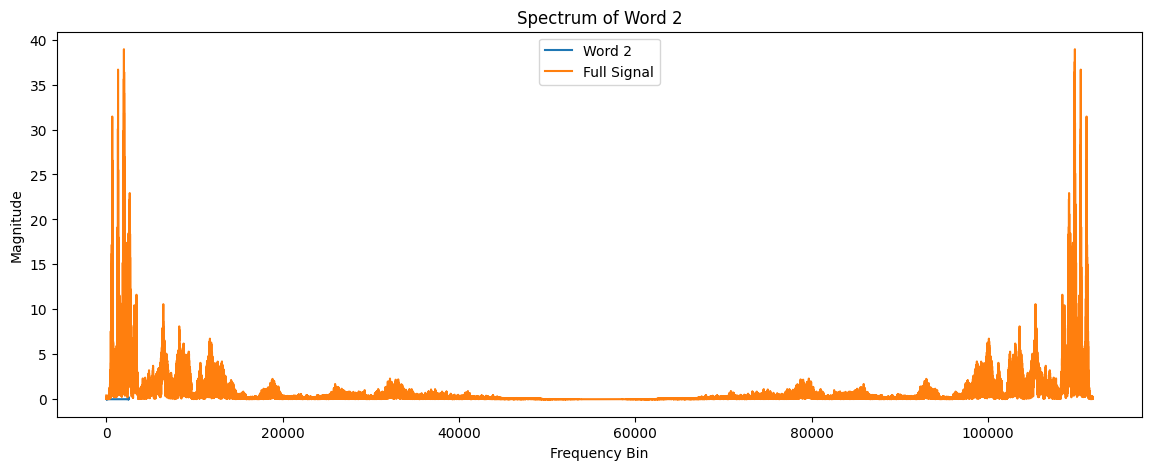

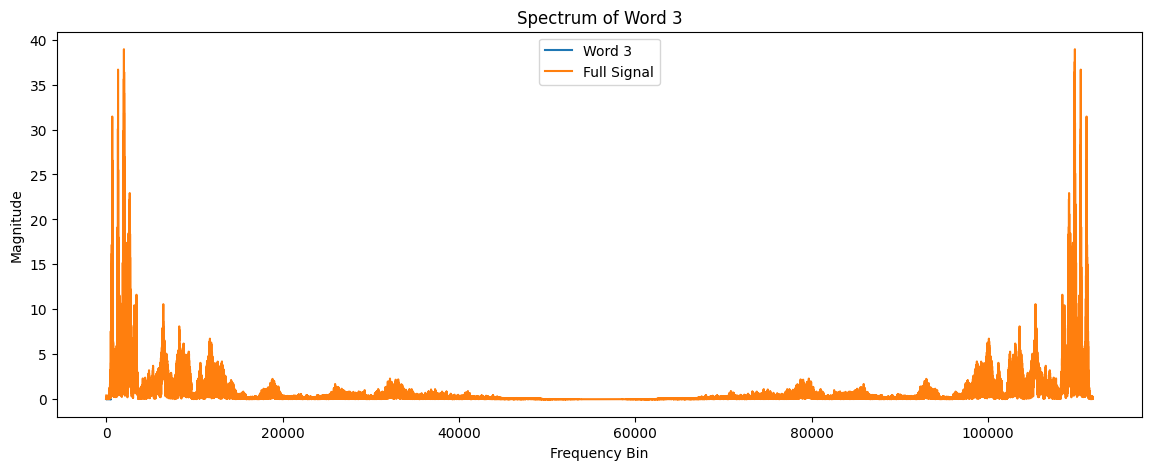

In [48]:
threshold = np.percentile(np.abs(y), 92)
segments = librosa.effects.split(y, top_db=-20 * np.log10(threshold))
for i, (start, end) in enumerate(segments):
    word = y[start:end]
    D_full = np.fft.fft(y)
    D_word = np.fft.fft(word)
    plt.figure(figsize=(14, 5))
    plt.plot(np.abs(D_word), label=f'Word {i+1}')
    plt.plot(np.abs(D_full), label='Full Signal')

    plt.title(f'Spectrum of Word {i+1}')
    plt.xlabel('Frequency Bin')
    plt.ylabel('Magnitude')
    plt.legend()
    plt.show()

# Q4. Take a rectangular window of 20 mili-second sampled at 22.5 KHz. Using FFT, analyse the spectral components

Text(0.5, 1.0, 'Frequency Spectrum of Speech Signal')

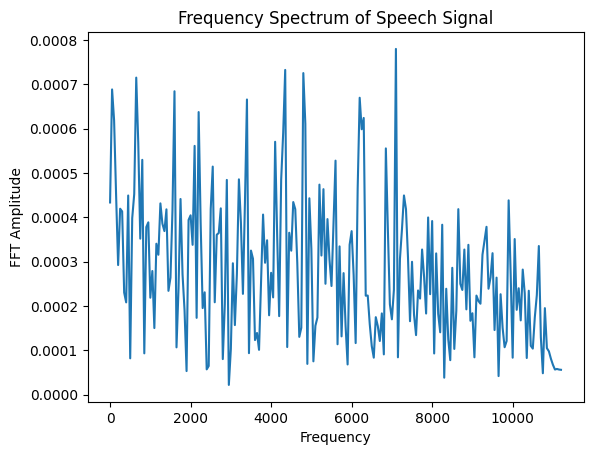

In [40]:
window_duration = 0.02
sr = 22500
window_samples = int(window_duration * sr)
windowed_signal = y[:window_samples]
X = np.fft.fft(windowed_signal)
n_oneside = window_samples // 2
frequencies = np.arange(n_oneside) * (sr / window_samples)
spectrum = np.abs(X[:n_oneside])

plt.plot(frequencies, spectrum)
plt.xlabel('Frequency')
plt.ylabel('FFT Amplitude')
plt.title('Frequency Spectrum of Speech Signal')

# Q5. Break your speech signal into window lengths of 20 mSec intervals. Evaluate the frequency components using numpy.fft.rfft(). Stack these frequency components as columns in a matrix. Use heatmap plot to display the matrix. You may use librosa.stft() or scipy.signal.stft() as well to achieve this.

Text(95.72222222222221, 0.5, 'Frequency')

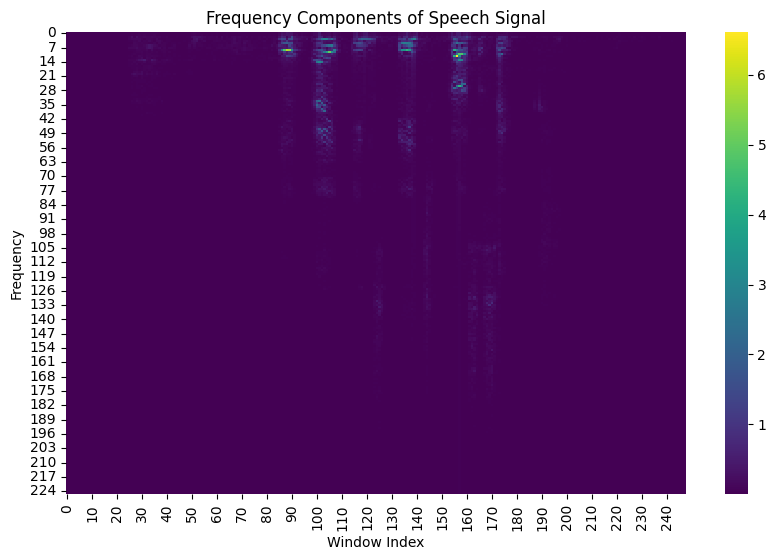

In [42]:
import seaborn as sns
window_length_sec = 0.02
window_length = int(window_length_sec * sr)
num_windows = len(y) // window_length
freq_matrix = np.zeros((num_windows, window_length // 2 + 1))
for i in range(num_windows):
    window = y[i * window_length: (i + 1) * window_length]
    fft_result = np.fft.rfft(window)
    freq_matrix[i, :] = np.abs(fft_result)

plt.figure(figsize=(10, 6))
sns.heatmap(freq_matrix.T, cmap='viridis', xticklabels=10)
plt.title('Frequency Components of Speech Signal')
plt.xlabel('Window Index')
plt.ylabel('Frequency')

# Q6. Use scipy.signal.spectrogram() to plot the spectrogram of the speech signal at the same duration. Compare the plots.

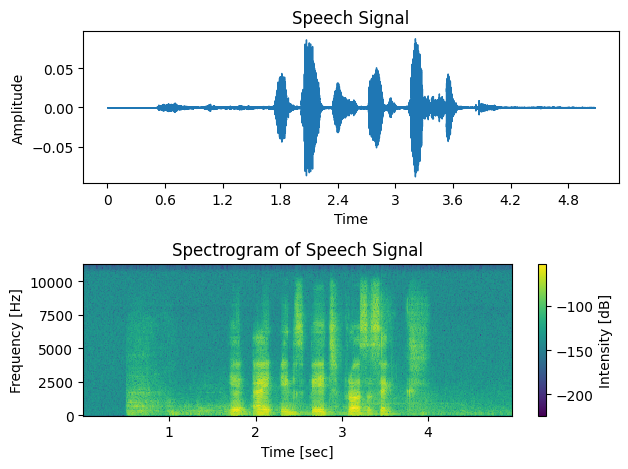

In [47]:
import scipy.signal as sp

plt.subplot(2, 1, 1)
librosa.display.waveshow(y)
plt.title('Speech Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
f, t, Sxx = sp.spectrogram(y, sr)
plt.pcolormesh(t, f, 10 * np.log10(Sxx))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Spectrogram of Speech Signal')
plt.colorbar(label='Intensity [dB]')

plt.tight_layout()